In [8]:
%pip install --upgrade pip setuptools wheel
%pip install pandas scikit-learn tpot matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [28]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from tpot import TPOTRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('data/student-mat.csv')
print(df.head)

<bound method NDFrame.head of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freet

In [11]:
columns_to_keep = ['G1', 'G2', 'G3', 'failures', 'studytime', 'age', 'absences', 'Medu', 'Fedu', 'health', 'school']
df = df[columns_to_keep]


In [4]:
print("Remaining columns:", df.columns)

Remaining columns: Index(['G1', 'G2', 'G3', 'failures', 'studytime', 'age', 'absences', 'Medu',
       'Fedu', 'health', 'school'],
      dtype='object')


In [12]:
df['school'] = df['school'].map({'GP': 0, 'MS': 1})

In [13]:
df = df.dropna()

In [14]:
X = df.drop('G3', axis=1)  # Features
y = df['G3']  # Target


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]

  File "C:\Users\kubap\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


Generation 1 - Current best internal CV score: -2.379347887936868

Generation 2 - Current best internal CV score: -2.368825706649517

Generation 3 - Current best internal CV score: -2.243772699217653

Generation 4 - Current best internal CV score: -2.243772699217653

Generation 5 - Current best internal CV score: -2.118114685026601

Best pipeline: XGBRegressor(input_matrix, learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.9500000000000001, verbosity=0)


TPOTRegressor(generations=5, population_size=50, random_state=42, verbosity=2)

In [ ]:
y_pred = tpot.predict(X_test)

In [ ]:
tpot.export('tpot_best_pipeline.py')

In [41]:
predictor = tpot.fitted_pipeline_

In [34]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

C:\Users\kubap\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [35]:
print("\nPerformance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


Performance Metrics:
Mean Absolute Error (MAE): 1.1894
Mean Squared Error (MSE): 3.5118
Root Mean Squared Error (RMSE): 1.8740
R-squared (R²): 0.8287


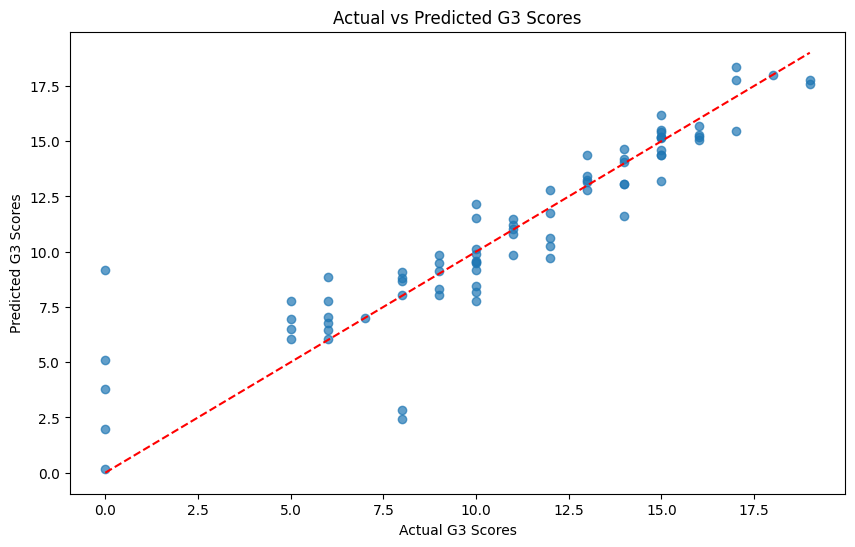

In [36]:
# Plot predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual G3 Scores')
plt.ylabel('Predicted G3 Scores')
plt.title('Actual vs Predicted G3 Scores')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal reference line
plt.show()